In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
from calendar import month_name, month_abbr

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Data import
dataSet = pd.read_excel('pgp capstone Project Retail/Online Retail.xlsx')
dataSet

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
dataSet.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
dataSet = dataSet[~dataSet.CustomerID.isna()]
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [5]:
dataSet.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [6]:
print(f'Duplicate items:  {dataSet.duplicated().sum()}')

Duplicate items:  5225


In [7]:
dataSet = dataSet[~dataSet.duplicated()]
print(f'Duplicate items:  {dataSet.duplicated().sum()}')

Duplicate items:  0


In [8]:
dataSet.CustomerID = (dataSet.CustomerID).astype(int)

In [9]:
# Separating transactions with cancelled items
df = dataSet[~dataSet.InvoiceNo.str.contains('C', na=False)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  int32         
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.5+ MB


In [10]:
df['Total_cost'] = df.Quantity * df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [11]:
df[['Quantity','UnitPrice','Total_cost']].describe()

,Quantity,UnitPrice,Total_cost
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,22.629195
std,181.588420,22.240725,311.083465
min,1.000000,0.000000,0.000000
25%,2.000000,1.250000,4.950000
50%,6.000000,1.950000,12.390000
75%,12.000000,3.750000,19.800000
max,80995.000000,8142.750000,168469.600000


In [12]:
# Top ten countries in the dataset with highest transactions
df.Country.value_counts(normalize=True).head(10).mul(100).round(1).astype(str) + '%'

United Kingdom    88.9%
Germany            2.3%
France             2.1%
EIRE               1.8%
Spain              0.6%
Netherlands        0.6%
Belgium            0.5%
Switzerland        0.5%
Portugal           0.4%
Australia          0.3%
Name: Country, dtype: object

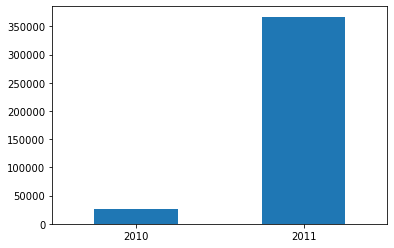

In [13]:
df.InvoiceDate.dt.year.value_counts(sort=False).plot(kind='bar', rot=360);

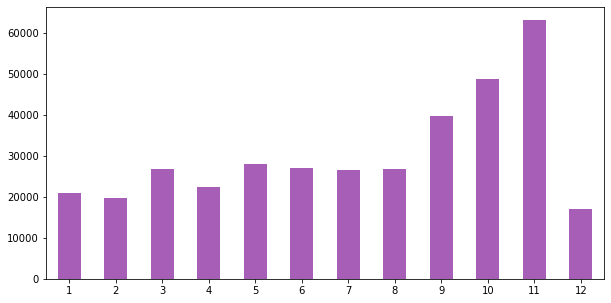

In [14]:
plt.figure(figsize=(10,5))
df[df.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False).plot(kind='bar', rot=360, color=(0.5, 0.1, 0.6, 0.7));


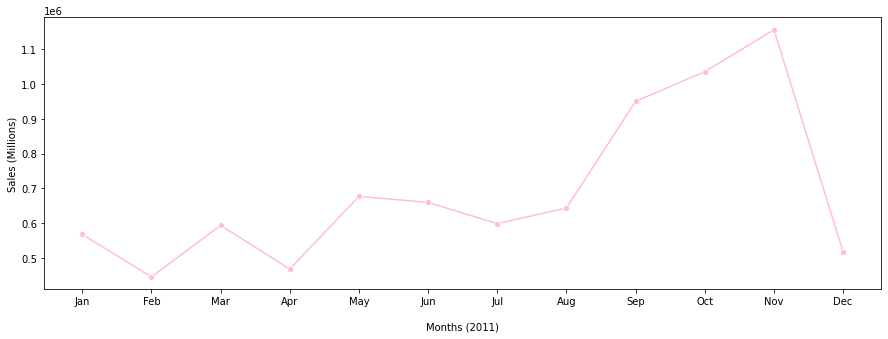

In [15]:
monthly_sales = df[df.InvoiceDate.dt.year==2011].groupby(df.InvoiceDate.dt.month).Total_cost.sum()
plt.figure(figsize=(15,5))
sns.lineplot(y=monthly_sales.values,x=monthly_sales.index, marker='o', color='pink');
labels = list(month_abbr)
labels.pop(0) 
plt.xticks(range(1,13),labels)
plt.ylabel("Sales (Millions)")
plt.xlabel("\nMonths (2011)")
plt.show();

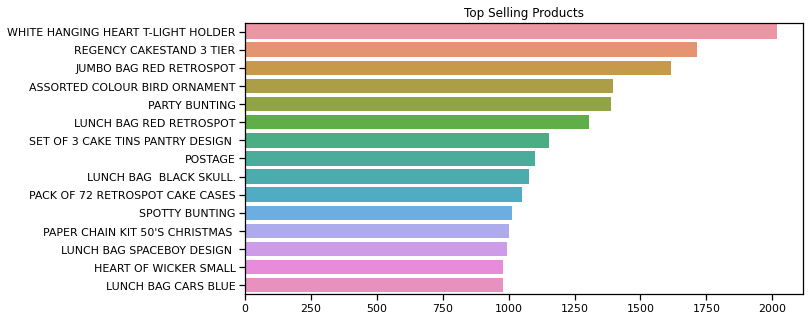

In [16]:
# Top Products
top_products = df['Description'].value_counts()[:15]
plt.figure(figsize=(10,5))
sns.set_context("notebook", font_scale=1)
sns.barplot(y = top_products.index,
            x = top_products.values)
plt.title("Top Selling Products")
plt.show();

In [17]:
cohort = dataSet.copy()

In [18]:
def month(x):
    return dt.datetime(x.year,x.month,1) 

# Creating New column
cohort['InvoiceMonth'] = cohort['InvoiceDate'].apply(month) 

grouping = cohort.groupby('CustomerID')['InvoiceMonth'] 

# Assigning Minimum InvoiceMonth value
cohort['CohortMonth'] = grouping.transform('min')
cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01


In [19]:
# Getting month and year
def date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [20]:
invoice_year, invoice_month = date_int(cohort,'InvoiceMonth')

cohort_year, cohort_month = date_int(cohort,'CohortMonth')

In [21]:
# Difference in years
years_diff = invoice_year - cohort_year

# Difference in months
months_diff = invoice_month - cohort_month

# Extract the difference in months from all previous values
cohort['CohortIndex'] = years_diff * 12 + months_diff + 1

In [22]:
cohort.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,2010-12-01,2010-12-01,1
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,2010-12-01,2010-12-01,1
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,2010-12-01,2010-12-01,1
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,2010-12-01,2010-12-01,1
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,2010-12-01,2010-12-01,1


In [23]:
# Calculating retention rate

In [24]:
grouping = cohort.groupby(['CohortMonth', 'CohortIndex'])

In [25]:
# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)*100

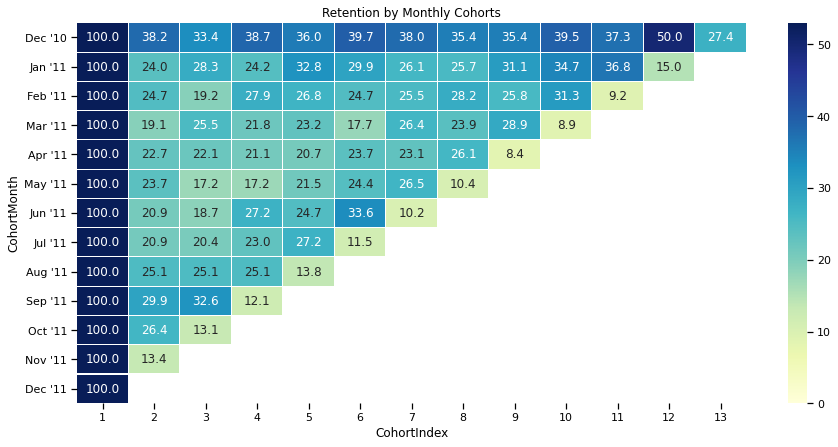

In [26]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11", "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]

plt.figure(figsize=(15,7))
plt.title('Retention by Monthly Cohorts')
# Generating Heatmap
sns.heatmap(data=retention,
            annot = True,
            cmap = "YlGnBu",
            vmin = 0.0,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.1,
            yticklabels=month_list)

plt.show();

In [27]:
# Average price per cohort

In [28]:
grouping = cohort.groupby(['CohortMonth', 'CohortIndex']) 

cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
average_price.round(1)
average_price.index = average_price.index.date

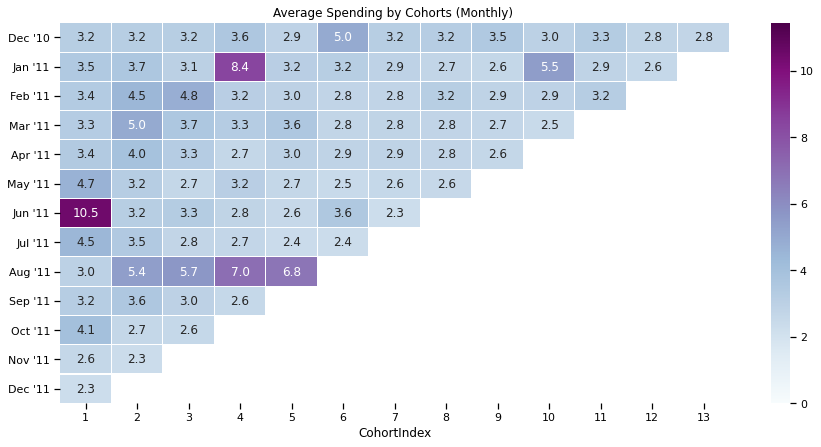

In [29]:
plt.figure(figsize=(15, 7))
plt.title('Average Spending by Cohorts (Monthly) ')

sns.heatmap(data = average_price,
            annot=True,
            vmin = 0.0,
            cmap='BuPu',
            vmax = list(average_price.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.1,
            yticklabels=month_list)
plt.show();

In [30]:
# Average quantity per cohort

In [31]:
grouping = cohort.groupby(['CohortMonth', 'CohortIndex']) 

# Average of Quantity column
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
# Pivot 
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')

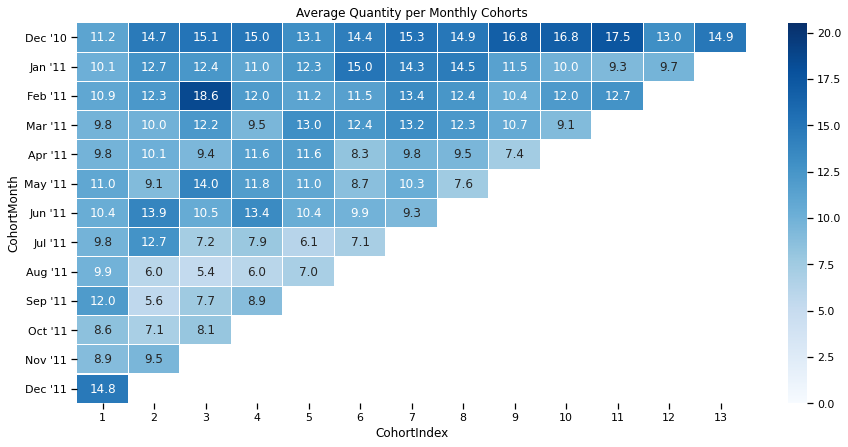

In [32]:
plt.figure(figsize=(15, 7))
plt.title('Average Quantity per Monthly Cohorts')

sns.heatmap(data = average_quantity,
            annot=True,
            vmin = 0.0,
            cmap='Blues',
            vmax = list(average_quantity.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.1,
            yticklabels=month_list)
plt.show();

In [33]:
# RFM Analysis

# Recency

In [34]:
# Creating rfm dataframe, finding non missing values in customer ID
rfm_df = dataSet[dataSet.CustomerID.notnull()].copy()
rfm_df.CustomerID = (rfm_df.CustomerID).astype(int)

rfm_df['Purchase_Date'] = rfm_df.InvoiceDate.dt.date

In [35]:

rfm_df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [36]:
current_date = dt.date(2011,12,9)

In [37]:
recency = rfm_df.groupby('CustomerID')['Purchase_Date'].max().reset_index()

In [38]:
# create new column (recency) for date (So that we can calculate how many days from last Purchase)
recency = recency.assign(Current_Date = current_date)

In [39]:
# Number of days since last purchase
recency['Recency'] = recency.Purchase_Date.apply(lambda x: (current_date - x).days)

In [40]:
recency.head()

,CustomerID,Purchase_Date,Current_Date,Recency
0,12346,2011-01-18,2011-12-09,325
1,12347,2011-12-07,2011-12-09,2
2,12348,2011-09-25,2011-12-09,75
3,12349,2011-11-21,2011-12-09,18
4,12350,2011-02-02,2011-12-09,310


In [41]:
recency.drop(['Purchase_Date','Current_Date'], axis=1, inplace=True)

In [42]:
recency

,CustomerID,Recency
0,12346,325
1,12347,2
2,12348,75
3,12349,18
4,12350,310
...,...,...
4367,18280,277
4368,18281,180
4369,18282,7
4370,18283,3


# Frequency

In [43]:
frequency = rfm_df.groupby('CustomerID').InvoiceNo.nunique().reset_index().rename(columns={'InvoiceNo':'Frequency'})

In [44]:
frequency.head()

,CustomerID,Frequency
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1


# Monetary

In [45]:
rfm_df['Total_cost'] = rfm_df.Quantity * rfm_df.UnitPrice

In [46]:
monetary = rfm_df.groupby('CustomerID').Total_cost.sum().reset_index().rename(columns={'Total_cost':'Monetary'})

In [47]:
monetary.head()

,CustomerID,Monetary
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [48]:
# Combining Recency, frequesncy & monetary
temp_ = recency.merge(frequency, on='CustomerID')
rfm_table = temp_.merge(monetary, on='CustomerID')

In [49]:
rfm_table.set_index('CustomerID',inplace=True)
rfm_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,2,0.00
12347,2,7,4310.00
12348,75,4,1797.24
12349,18,1,1757.55
12350,310,1,334.40


In [50]:
# Customer segments

In [51]:
# Forming RFM Quantiles (Dividing into groups)
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,16.0,1.0,291.795
0.50,50.0,3.0,644.070
0.75,143.0,5.0,1608.335


In [52]:
# Making a Quantile Dict. is very usefull for cutoffs and assigning ranks
quantiles=quantiles.to_dict()
quantiles

{'Recency': {0.25: 16.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 5.0},
 'Monetary': {0.25: 291.79499999999996,
  0.5: 644.0700000000002,
  0.75: 1608.335}}

In [53]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quantiles dict) [In case of Recency Low rank 4: 0.25 is very good]
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [54]:
# In case of Frequency & Monetary, High rank 4: >0.75 is considered very good 
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [55]:
rfm_segment = rfm_table.copy()
rfm_segment['R_Quartile'] = rfm_segment['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segment['F_Quartile'] = rfm_segment['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segment['M_Quartile'] = rfm_segment['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [56]:
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346,325,2,0.00,1,2,1
12347,2,7,4310.00,4,4,4
12348,75,4,1797.24,2,3,4
12349,18,1,1757.55,3,1,4
12350,310,1,334.40,1,1,2


In [57]:
# Lets Combine the R_Quartile, F_Quartile, M_Quartile to get a Proper RFM Score Column
rfm_segment['RFMScore'] = rfm_segment.R_Quartile.map(str) \
                            + rfm_segment.F_Quartile.map(str) \
                            + rfm_segment.M_Quartile.map(str)
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12346,325,2,0.00,1,2,1,121
12347,2,7,4310.00,4,4,4,444
12348,75,4,1797.24,2,3,4,234
12349,18,1,1757.55,3,1,4,314
12350,310,1,334.40,1,1,2,112


### RFM Segment allocation

In [58]:
# Reset the index to create a customer_ID column
rfm_segment.reset_index(inplace=True)

In [59]:
# Create a dictionary for each segment to map them against each customer
segment_dict = {
    'Best Customers':'444',      # Highest frequency as well as monetary value with least recency
    'Loyal Customers':'344',     # High frequency as well as monetary value with good recency
    'Big Spenders':'334',        # High monetary value but good recency and frequency values
    'Almost Lost':'244',         # Customer's shopping less often now who used to shop a lot
    'Lost Customers':'144',      # Customer's shopped long ago who used to shop a lot.
    'Recent Customers':'443',    # Customer's who recently started shopping a lot but with less monetary value
    'Lost Cheap Customers':'122' # Customer's shopped long ago but with less frequency and monetary value
}

In [60]:
# Swap the key and value of dictionary
dict_segment = dict(zip(segment_dict.values(),segment_dict.keys()))

In [61]:
# Allocating segments to each customer as per the RFM score
rfm_segment['Segment'] = rfm_segment.RFMScore.map(lambda x: dict_segment.get(x))

In [62]:
# Allocate all remaining customers to others segment category
rfm_segment.Segment.fillna('others', inplace=True)

In [63]:
rfm_segment.sample(10)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
3360,16893,366,1,145.93,1,1,1,111,others
1867,14873,210,1,519.68,1,1,2,112,others
3116,16563,53,1,1077.74,2,1,3,213,others
1853,14856,36,3,1290.53,3,2,3,323,others
3489,17069,28,13,2655.22,3,4,4,344,Loyal Customers
325,12739,78,2,1013.04,2,2,3,223,others
535,13040,8,2,676.99,4,2,3,423,others
2714,16019,1,10,3450.24,4,4,4,444,Best Customers
527,13029,30,3,1247.50,3,2,3,323,others
1824,14813,369,2,152.88,1,2,1,121,others


In [64]:
# Lets see who are the best Customers using RFMScore (444)
rfm_segment[rfm_segment.RFMScore=='444'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
1703,14646,1,77,279489.02,4,4,4,444,Best Customers
4233,18102,0,62,256438.49,4,4,4,444,Best Customers
3758,17450,8,55,187322.17,4,4,4,444,Best Customers
1895,14911,1,248,132458.73,4,4,4,444,Best Customers
1345,14156,9,66,113214.59,4,4,4,444,Best Customers


In [65]:
# Biggest spenders
rfm_segment[rfm_segment.RFMScore=='334'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
2794,16126,29,4,6287.77,3,3,4,334,Big Spenders
737,13316,37,5,5570.69,3,3,4,334,Big Spenders
2923,16303,25,4,5305.83,3,3,4,334,Big Spenders
2897,16258,45,5,5203.51,3,3,4,334,Big Spenders
70,12432,42,5,5059.32,3,3,4,334,Big Spenders


In [66]:
# Almost Lost i.e. who's recency value is low
rfm_segment[rfm_segment.RFMScore=='244'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
464,12939,64,8,11581.80,2,4,4,244,Almost Lost
50,12409,78,7,11056.93,2,4,4,244,Almost Lost
2836,16180,100,10,10217.48,2,4,4,244,Almost Lost
328,12744,51,10,9120.39,2,4,4,244,Almost Lost
3248,16745,86,18,7157.10,2,4,4,244,Almost Lost


In [67]:
# Lost customers, that don't needs attention. Who's recency, frequency & monetary values are very low
rfm_segment[rfm_segment.RFMScore=='122'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
1578,14481,164,2,636.51,1,2,2,122,Lost Cheap Customers
2246,15384,169,3,635.76,1,2,2,122,Lost Cheap Customers
1230,14000,206,2,633.71,1,2,2,122,Lost Cheap Customers
1985,15045,151,3,633.66,1,2,2,122,Lost Cheap Customers
1391,14220,247,2,632.40,1,2,2,122,Lost Cheap Customers


In [68]:
# loyal customers, who purchase frequently 
rfm_segment[rfm_segment.RFMScore=='344'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
55,12415,24,26,123725.45,3,4,4,344,Loyal Customers
2722,16029,38,76,53168.69,3,4,4,344,Loyal Customers
3014,16422,17,75,33805.69,3,4,4,344,Loyal Customers
458,12931,21,20,33462.81,3,4,4,344,Loyal Customers
1728,14680,25,23,26932.34,3,4,4,344,Loyal Customers


# K-Means Clustering

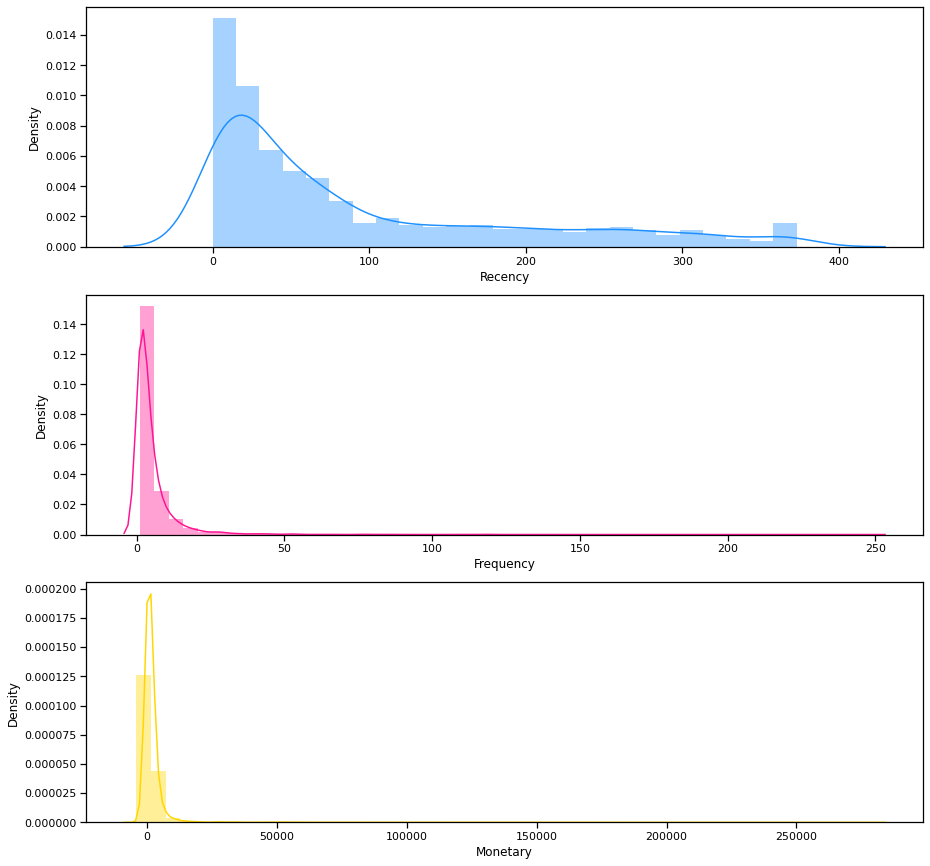

In [69]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(rfm_table.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(rfm_table.Frequency , color="deeppink", ax=axes[1], axlabel='Frequency')
sns.distplot(rfm_table.Monetary , color="gold", ax=axes[2], axlabel='Monetary')
# plt.xlim(50,75);
plt.show();

In [70]:
rfm_table.describe()

,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000
mean,91.581199,5.075480,1893.531433
std,100.772139,9.338754,8218.696204
min,0.000000,1.000000,-4287.630000
25%,16.000000,1.000000,291.795000
50%,50.000000,3.000000,644.070000
75%,143.000000,5.000000,1608.335000
max,373.000000,248.000000,279489.020000


In [71]:
# Monetary contains Negative values, lets make sure that min vaule starts from 1 as in log transformation may lead to errors

rfm_table_scaled = rfm_table.copy()

# Adding absolute of minimum value to each column value, thereby making each value positive.
rfm_table_scaled.Monetary = rfm_table_scaled.Monetary + abs(rfm_table_scaled.Monetary.min()) + 1
rfm_table_scaled.Recency = rfm_table_scaled.Recency + abs(rfm_table_scaled.Recency.min()) + 1

rfm_table_scaled.describe()

,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000
mean,92.581199,5.075480,6182.161433
std,100.772139,9.338754,8218.696204
min,1.000000,1.000000,1.000000
25%,17.000000,1.000000,4580.425000
50%,51.000000,3.000000,4932.700000
75%,144.000000,5.000000,5896.965000
max,374.000000,248.000000,283777.650000


In [72]:
from sklearn.preprocessing import StandardScaler

# Taking log first because normalization forces data for negative values
log_df = np.log(rfm_table_scaled)

# Normalize the data for uniform averages and means in the distribution.
scaler = StandardScaler()
normal_df = scaler.fit_transform(log_df)
normal_df = pd.DataFrame(data=normal_df, index=rfm_table.index, columns=rfm_table.columns)

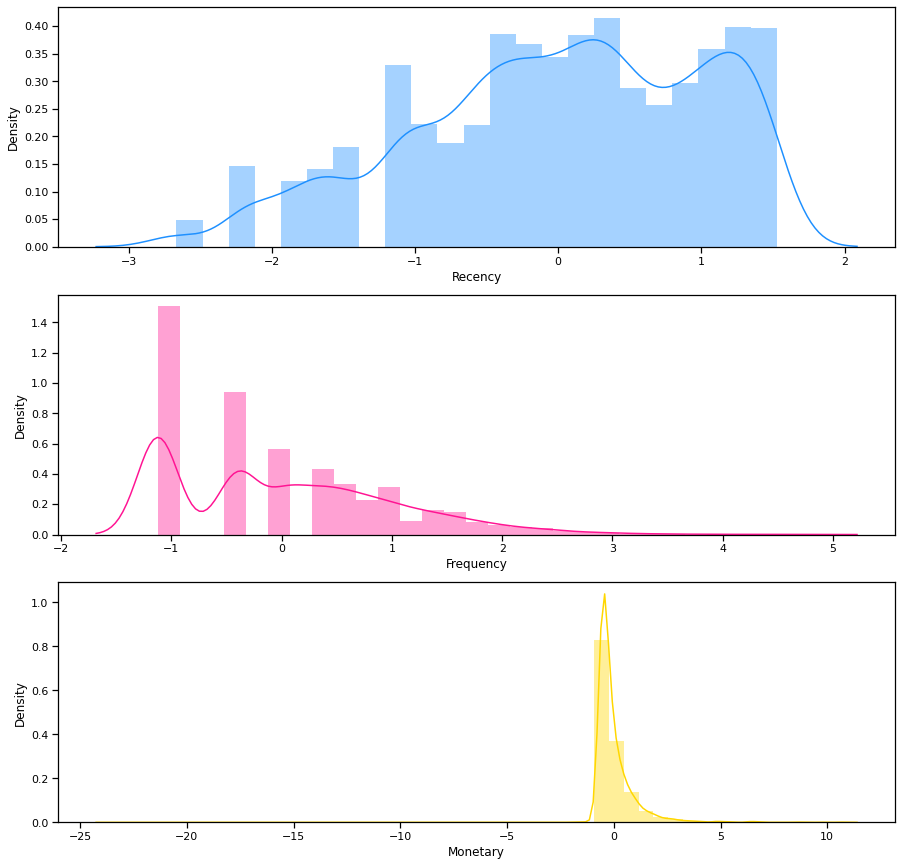

In [73]:
# ploting transformed RFM data
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(normal_df.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(normal_df.Frequency , color="deeppink", ax=axes[1], axlabel='Frequency')
sns.distplot(normal_df.Monetary , color="gold", ax=axes[2], axlabel='Monetary')
plt.show();

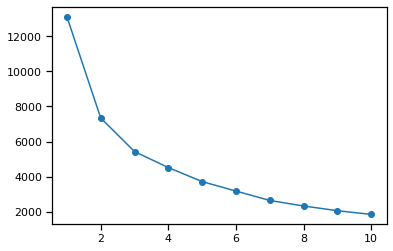

In [74]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(normal_df)
    wcss.append(kmeans.inertia_)

# Elbow graph
plt.plot(range(1,11),wcss,marker='o');

In [75]:
kmeans = KMeans(n_clusters=4, random_state=1, init='k-means++')
kmeans.fit(normal_df)
cluster_labels = kmeans.labels_

In [77]:
# Assign the clusters as column to each customer
Cluster_table = rfm_segment.assign(Cluster = cluster_labels)

In [78]:
Cluster_table.Cluster.value_counts()

2    1781
0    1595
1     875
3     121
Name: Cluster, dtype: int64

In [79]:
Cluster_table.sample(10)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
902,13539,85,4,605.84,2,3,2,232,others,0
2053,15127,65,1,406.53,2,1,2,212,others,2
1508,14388,8,10,3172.04,4,4,4,444,Best Customers,1
2746,16062,9,4,1153.62,4,3,3,433,others,0
2692,15990,44,2,792.11,3,2,3,323,others,0
3980,17746,234,2,98.80,1,2,1,121,others,2
2390,15576,37,1,921.37,3,1,3,313,others,2
2822,16162,252,1,37.40,1,1,1,111,others,2
2229,15361,361,1,418.92,1,1,2,112,others,2
749,13329,31,4,740.40,3,3,3,333,others,0


NOTE: we can observe that RFM score is very low for customers in 0 & 3 cluster. Comparetivey, customers in 1&2 clusters have high RFM scores along with above average Recency and frequency values.

In [80]:
Cluster_table[Cluster_table.Cluster == 3].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
277,12682,3,31,12279.82,4,4,4,444,Best Customers,3
2798,16133,3,46,14305.66,4,4,4,444,Best Customers,3
3014,16422,17,75,33805.69,3,4,4,344,Loyal Customers,3
3609,17243,1,30,8491.75,4,4,4,444,Best Customers,3
569,13090,8,18,8689.39,4,4,4,444,Best Customers,3


Cluster 2 contains Loyal customers with low recency, good frequency and high monetary value.

In [81]:
Cluster_table[Cluster_table.Cluster == 1].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
1739,14696,4,9,2070.97,4,4,4,444,Best Customers,1
3147,16609,15,9,5450.96,4,4,4,444,Best Customers,1
2403,15594,15,6,1767.53,4,4,4,444,Best Customers,1
824,13437,14,7,3408.06,4,4,4,444,Best Customers,1
1761,14723,10,6,1122.36,4,4,3,443,Recent Customers,1


Cluster 1 contains Loyal customers with very high monetary value along with good frequency and recency values.

In [82]:
Cluster_table[Cluster_table.Cluster == 0].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
1527,14414,91,8,1485.13,2,4,3,243,others,0
527,13029,30,3,1247.50,3,2,3,323,others,0
1491,14359,19,6,882.58,3,4,3,343,others,0
2645,15919,19,2,525.69,3,2,2,322,others,0
2163,15269,23,1,408.80,3,1,2,312,others,0


In Cluster 0 we got highest number of customers who accounts for lowest value

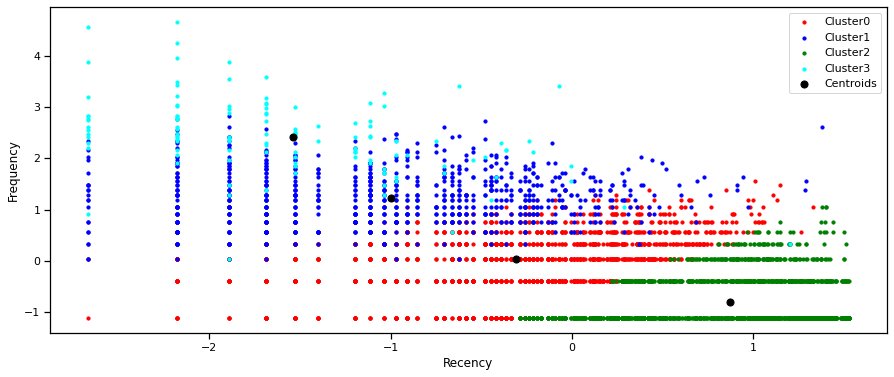

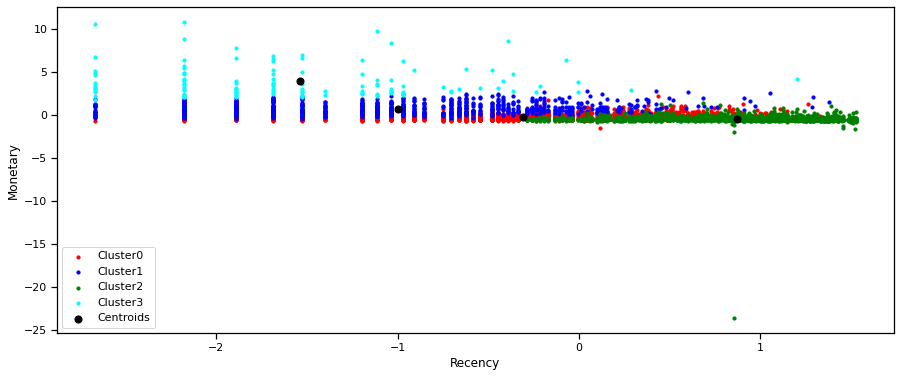

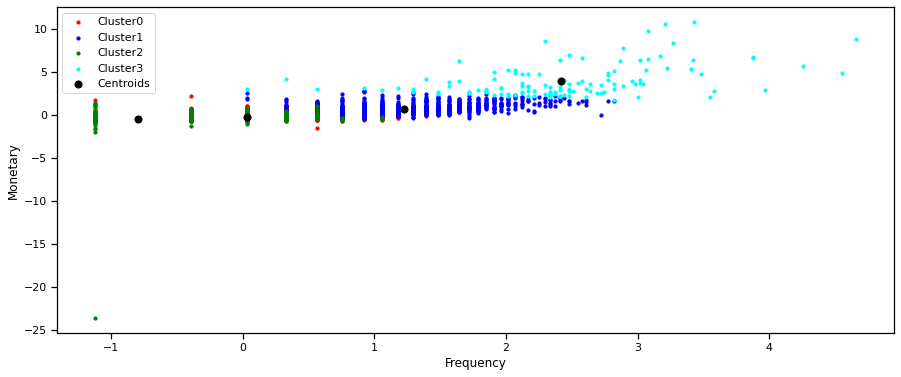

In [83]:
# Plotting two dimesional plots of each attributes respectively.
X = normal_df.iloc[:,0:3].values
count=X.shape[1]
for i in range(0,count):
    for j in range(i+1,count):
        plt.figure(figsize=(15,6));
        plt.scatter(X[cluster_labels == 0, i], X[cluster_labels == 0, j], s = 10, c = 'red', label = 'Cluster0')
        plt.scatter(X[cluster_labels == 1, i], X[cluster_labels == 1, j], s = 10, c = 'blue', label = 'Cluster1')
        plt.scatter(X[cluster_labels == 2, i], X[cluster_labels == 2, j], s = 10, c = 'green', label = 'Cluster2')
        plt.scatter(X[cluster_labels == 3, i], X[cluster_labels == 3, j], s = 10, c = 'cyan', label = 'Cluster3')
        plt.scatter(kmeans.cluster_centers_[:,i], kmeans.cluster_centers_[:,j], s = 50, c = 'black', label = 'Centroids')
        plt.xlabel(normal_df.columns[i])
        plt.ylabel(normal_df.columns[j])
        plt.legend()        
        plt.show();

# Tableau Dashboard

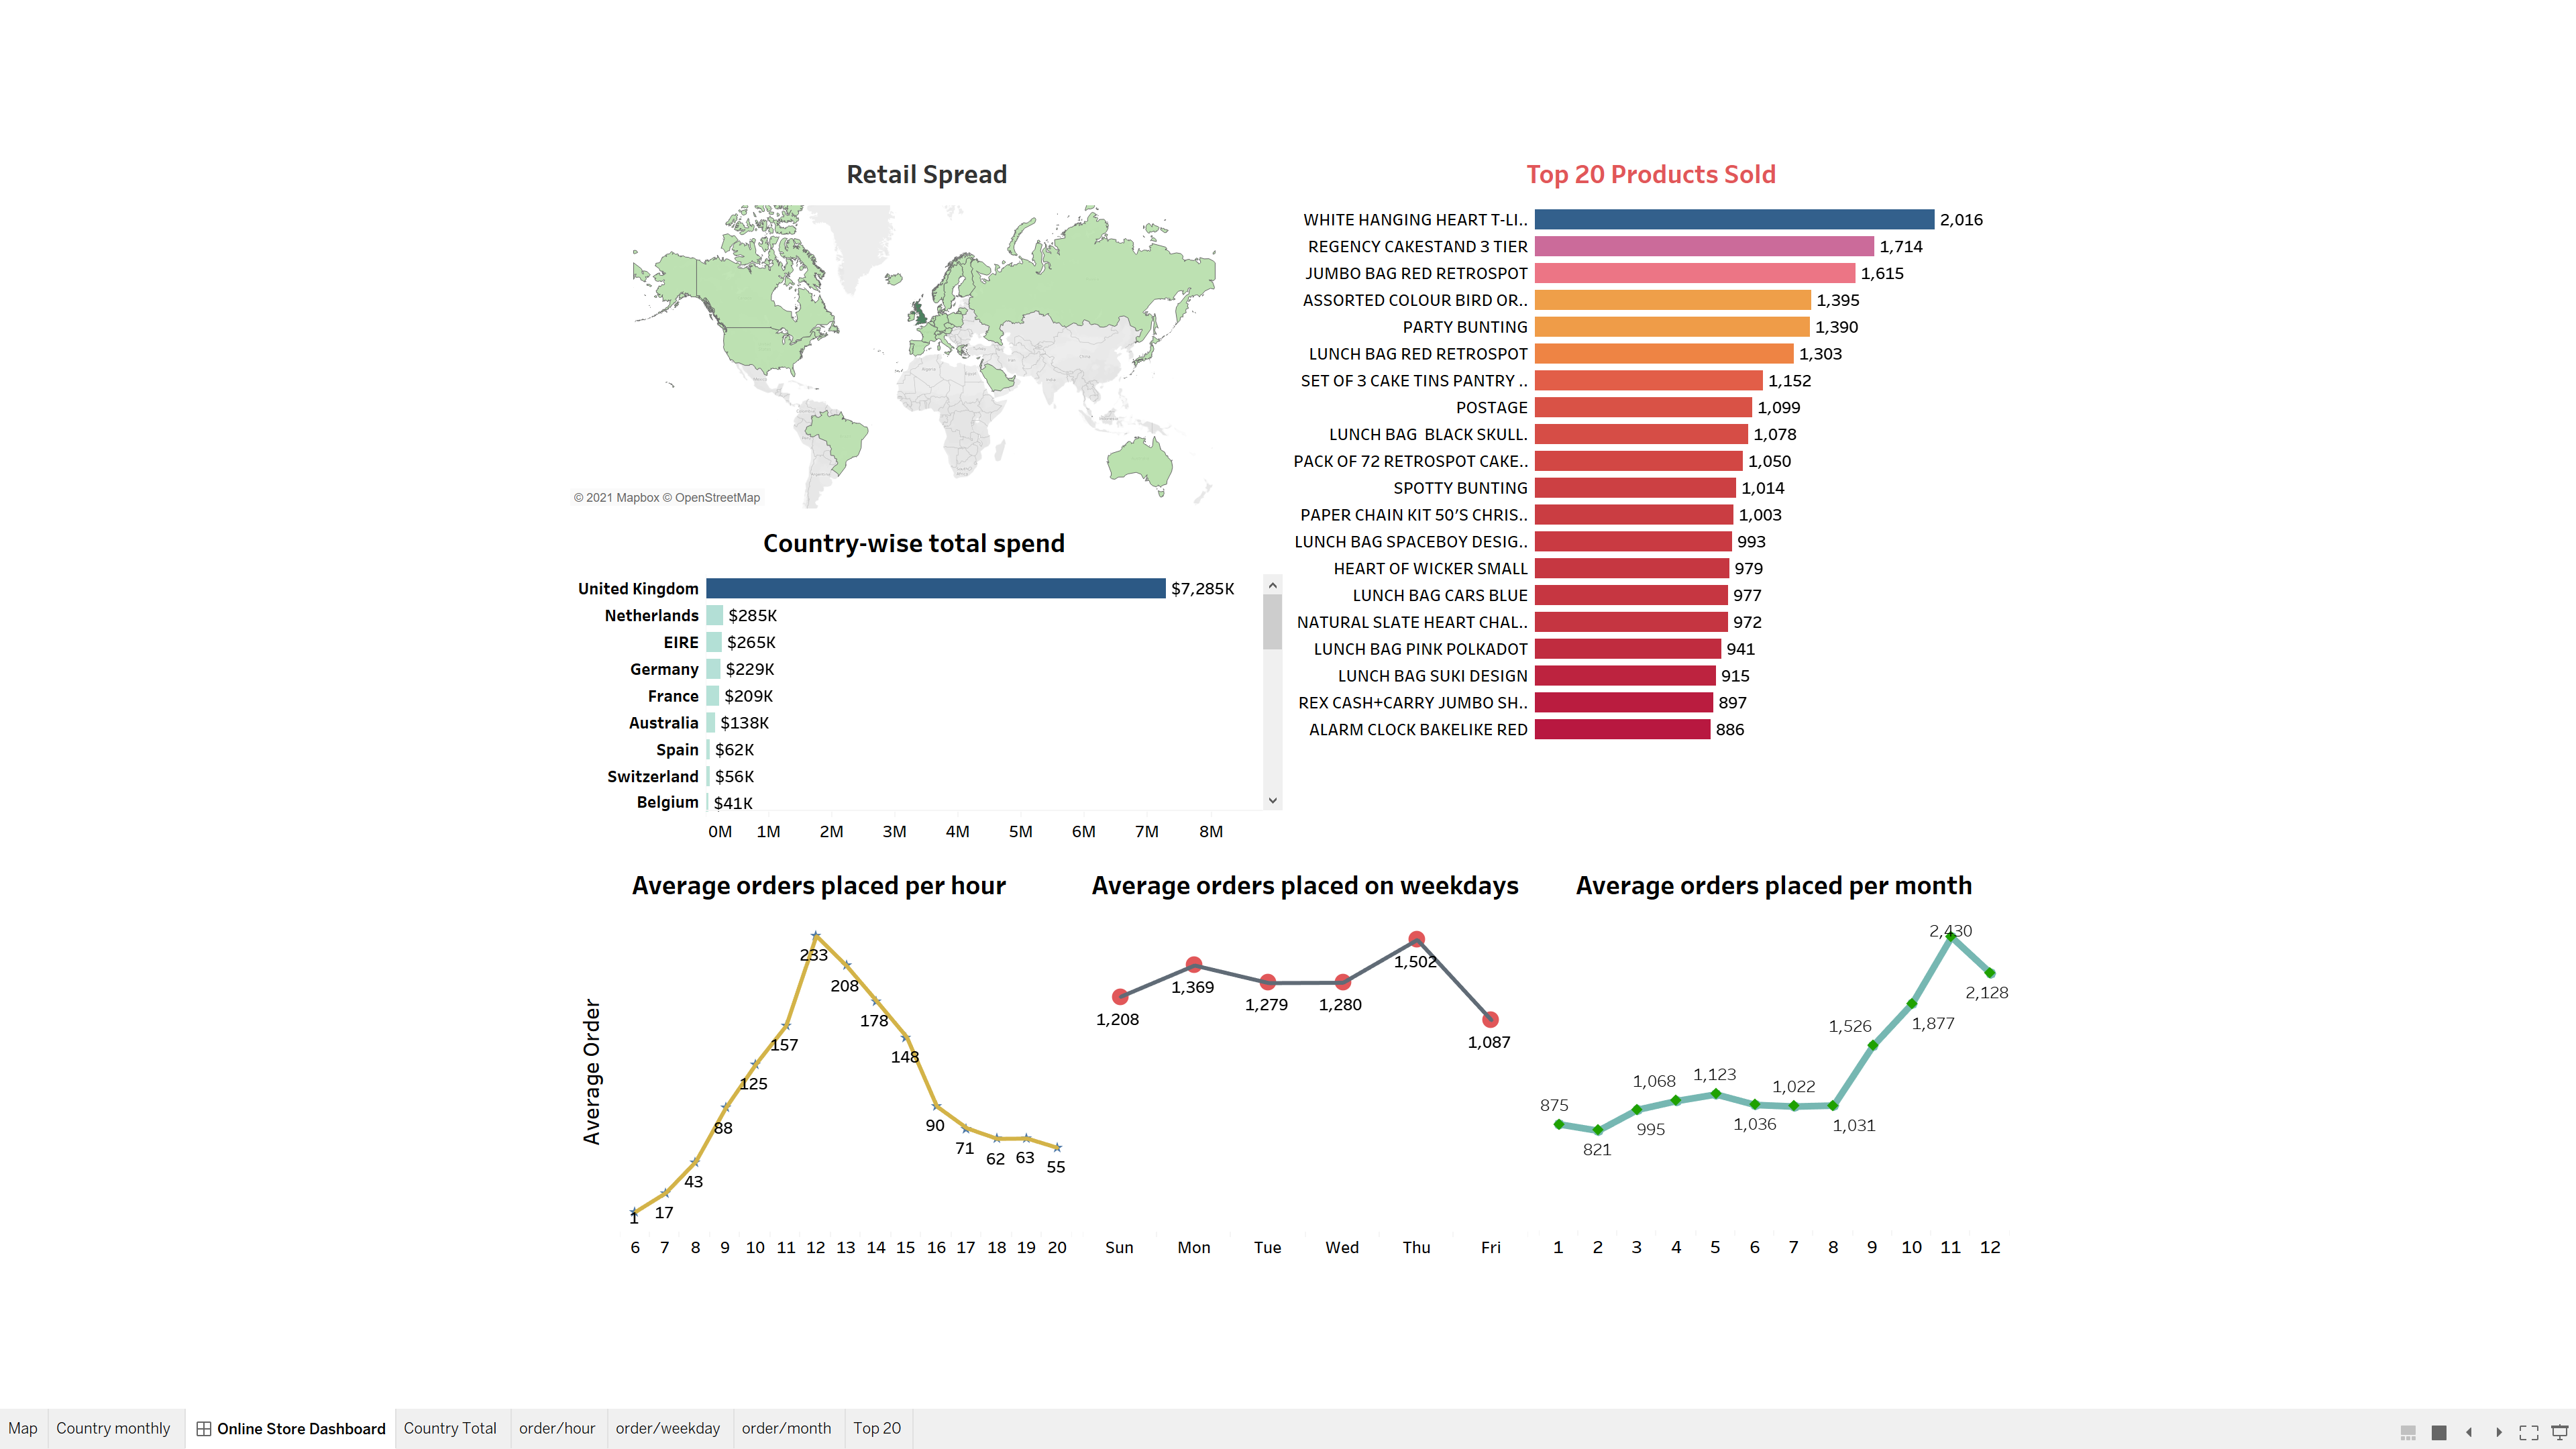

In [85]:
from IPython.display import Image

Image(filename = "tableu retail project.png", width = 1600, height = 1300)

### Link to Tableau Public: 
https://public.tableau.com/profile/rajeev4682#!/vizhome/Multinationalonlineretailstoredataanalysis_16105271519620/OnlineStoreDashboard